<a href="https://colab.research.google.com/github/navneetkrc/Colab_fastai/blob/master/captcha_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import layers
from keras.models import Model
from keras.models import load_model
from keras import callbacks
import os
import cv2
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




Using TensorFlow backend.


In [0]:
!ls

gdrive	sample_data  symbols


In [0]:
symbols = "abcdef" + "0123456789" # All symbols captcha can contain
num_symbols = len(symbols)
img_shape = (40, 150, 1)

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
#!cp -r /content/gdrive/My\ Drive/captchas/sym  /content/sym2/
!ls

new_captchas_labelling.csv  TIMES.TTF		   train_set_clean
new_train_set		    train_set_captcha	   train_set_clean.zip
sample_data		    train_set_captcha.zip


In [0]:
os.listdir('/content/dataset/')

In [0]:
def create_model():
    img = layers.Input(shape=img_shape) # Get image as an input and process it through some Convs
    conv1 = layers.Conv2D(16, (3, 3), padding='same', activation='relu')(img)
    mp1 = layers.MaxPooling2D(padding='same')(conv1)  # 100x25
    conv2 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp1)
    mp2 = layers.MaxPooling2D(padding='same')(conv2)  # 50x13
    conv3 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp2)
    bn = layers.BatchNormalization()(conv3)
    mp3 = layers.MaxPooling2D(padding='same')(bn)  # 25x7
    
    # Get flattened vector and make 5 branches from it. Each branch will predict one letter
    flat = layers.Flatten()(mp3)
    outs = []
    for _ in range(9):
        dens1 = layers.Dense(64, activation='relu')(flat)
        drop = layers.Dropout(0.4)(dens1)
        res = layers.Dense(num_symbols, activation='sigmoid')(drop)

        outs.append(res)
    
    # Compile model and return it
    model = Model(img, outs)
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])
    print(model.summary())
    return model

In [0]:
model = create_model()

In [0]:
symbols.find('9')

15

In [0]:
def preprocess_data():
    n_samples = len(os.listdir('/content/train_set_captcha'))
    
    
    X = np.zeros((n_samples, 40, 150)) #1070*50*200
    y = np.zeros((1, n_samples, num_symbols)) #5*1070*36

    for i, pic in enumerate(os.listdir('/content/train_set_captcha')):
        # Read image as grayscale
        img = cv2.imread(os.path.join('/content/train_set_captcha/', pic), cv2.IMREAD_GRAYSCALE)
        print(img.shape)
        labelling_csv = pd.read_csv('/content/new_captchas_labelling.csv')

        texts = labelling_csv.loc[:, 'label'].to_dict()
       
        pic_target = texts[i]
        print(len(pic_target))

        # Scale and reshape image
        img = img / 255.0
        #img = np.reshape(img, (30,90, 1))
        # Define targets and code them using OneHotEncoding
        targs = np.zeros((len(pic_target), num_symbols))
        #targs = np.reshape(targs, (9,36))
        for j, l in enumerate(pic_target):
            ind = symbols.find(l)
            targs[j, ind] = 1
        X[i] = img
        y[:, i] = targs

    # Return final data
    return X, y


In [0]:
    for i, pic in enumerate(os.listdir('/content/train_set_captcha')):
        # Read image as grayscale
        img = cv2.imread(os.path.join('/content/train_set_captcha/', pic), cv2.IMREAD_GRAYSCALE)
        print(img.shape)
        img = img / 255.0
   
        print(img.shape, img)
        
      
        
        
        


In [0]:
len(os.listdir('/content/train_set/'))

In [0]:

X, y = preprocess_data()
X_train, y_train = X[:1250], y[:, :1250]
X_test, y_test = X[1251:], y[:, 1251:]

In [0]:
hist = model.fit(X_train, [y_train[0]], batch_size=1, epochs=620,verbose=1, validation_split=0.2)

In [0]:
# Define function to predict captcha
def predict(filepath):
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        img = img / 255.0
    else:
        print("Not detected");
    res = np.array(model.predict(img[np.newaxis, :, :, np.newaxis]))
    ans = np.reshape(res, (9, 36))
    l_ind = []
    probs = []
    for a in ans:
        l_ind.append(np.argmax(a))
        #probs.append(np.max(a))

    capt = ''
    for l in l_ind:
        capt += symbols[l]
    return capt#, sum(probs) / 5

In [0]:
score= model.evaluate(X_test,[y_test[1]],verbose=1)
print('Test Loss and accuracy:', score)

In [0]:
model.evaluate(X_test, [y_test[0], y_test[1], y_test[2], y_test[3], y_test[4],y_test[5], y_test[6], y_test[7], y_test[8]])
print(predict("gdrive/My Drive/captchas/train_set/c8bff503d.png"))
print(predict("gdrive/My Drive/captchas/train_set/ecbfd006.png"))
print(predict("gdrive/My Drive/captchas/train_set/7f94a.png"))
print(predict("gdrive/My Drive/captchas/train_set/a8bddb.png"))
print(predict('gdrive/My Drive/captchas/train_set/88312.png'))


In [0]:
#! cp "gdrive/My Drive/captchas/train_set/a8bddb.png" /content/
#!ls
import pytesseract
from PIL import Image

!sudo apt install tesseract-ocr
!sudo apt install libtesseract-dev

In [0]:
from google.colab import files
files.upload()# font uploaded here is TIMES.TTF from https://cs.fit.edu/code/svn/ndworld/Resources/Fonts/times.ttf


In [0]:
#!pip install claptcha
from PIL import Image
import random
import string
#from claptcha import Claptcha

def randst():
     rnd = (random.choice('abcdef0123456789') for _ in range(random.randint(4,9)))
     return "".join(rnd)



In [0]:


!ls

new_train_set  sample_data  TIMES.TTF  train_set_captcha  train_set_clean


In [0]:
!mkdir train_set_clean

In [0]:
from IPython.display import Image as pyimg, display
import matplotlib.pyplot as plt
texts = {"captcha":[], "label" : []}
for i in range(2500):
  a = randst()
  c = Claptcha(a, "TIMES.TTF", resample= Image.BICUBIC, noise=0.0)
  cn = Claptcha_non_strike(a, "TIMES.TTF", resample= Image.BICUBIC, noise=0.0)
  text, imag = c.write('train_set_captcha/' +'captcha' +str(i) + '.png')
  display(pyimg(imag))
  texts["captcha"].append('captcha' +str(i) + '.png')
  texts["label"].append(text)
  #img = Image.open(str(text) + '.png')
  text, imag = cn.write('train_set_clean/' +'captcha' +str(i) + '.png')
  display(pyimg(imag))
  
  

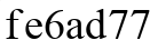

In [0]:
from IPython.display import Image as pyimg, display
import matplotlib.pyplot as plt

display(pyimg('/content/train_set_clean/captcha0.png'))

In [0]:
#os.listdir('/content/train_set/')
!zip -r /content/train_set_captcha.zip /content/train_set_captcha
!zip -r /content/train_set_clean.zip /content/train_set_clean

In [0]:
files.download('/content/train_set_captcha.zip')
files.download('/content/train_set_clean.zip')

#capcha downloaded as needed



---





---

#other experiments

In [0]:
#!ls
from IPython.display import Image as pyimg, display
import matplotlib.pyplot as plt
#display(pyimg('train_set/captcha2.png'))
#(os.listdir('/content/new_set/'))
import pandas as pd
pd_ob = pd.DataFrame(texts)
print(pd_ob)
pd_ob.to_csv('new_captchas_labelling.csv')
files.download('new_captchas_labelling.csv')

In [0]:
text, im = c.write('captcha.png')
img = Image.open('captcha.png')
print(img.size)


(150, 40)


In [0]:
from IPython.display import Image as pyimg, display
import matplotlib.pyplot as plt

display(pyimg(img))

/usr/local/lib/python3.6/dist-packages/IPython/core/formatters.py:364: FormatterWarning: image/png formatter returned invalid type <class 'PIL.PngImagePlugin.PngImageFile'> (expected (<class 'bytes'>, <class 'str'>)) for object: <IPython.core.display.Image object>
  FormatterWarning


<IPython.core.display.Image object>

In [0]:

# -*- coding: utf-8 -*-

"""This module defines Claptcha and ClaptchaError classes."""

import sys
import os
import random
from functools import wraps
from io import BytesIO
from PIL import Image, ImageDraw, ImageFont


class ClaptchaError(Exception):
    """Exception class for Claptcha errors."""

    pass


class Claptcha_non_strike(object):
    r"""
    Claptcha class.
    Claptcha can be use to create PIL Images, BytesIO objects and image
    files with CAPTCHA messages. User has to provide at least a source
    (a string containing text used in CAPTCHA image or a callable object
    returning a string) and a filepath to TTF font file.
    Additionally, Claptcha allows to define image size and estimated
    margins, used in automatically calculating font size. By default,
    Claptcha generates a PNG image using bicubic resampling filter
    (configurable).
    Optionally, user can define white noise, making it less readable for
    OCR software. However, this significantly extends execution time of
    image creation.
    """

    def __init__(self, source, font,
                 size=(150, 40), margin=(5, 1),
                 **kwargs):
        r"""
        Claptcha object init.
        Claptcha object requires at least a text source (a string or a
        callable object returning a string) and a path to a TTF file. Both
        are used in generating text in returned CAPTCHA image with a given
        font. Callable object allow for creating variable CAPTCHAs without
        redeclaring Claptcha instance, e.g. a randomized stream of characters
        :param source:
            String or a callable object returning a string.
        :param font:
            Valid path (relative or absolute) to a TTF file.
        :param size:
            A pair with CAPTCHA size (width, height)
            in pixels.
        :param margin:
            A pair with CAPTCHA x and y margins in pixels
            Note that generated text may slightly overlap
            given margins, you should treat them only as
            an estimate.
        :param \**kwargs:
            See below
        :Keyword Arguments:
            * *format* (``string``) --
              Image format acceptable by Image class from PIL package.
            * *resample* (``int``) --
              Resampling filter. Allowed: Image.NEAREST, Image.BILINEAR and
              Image.BICUBIC. Default: Image.BILINEAR.
            * *noise* (``float``) --
              Parameter from range [0,1] used in creating noise effect in
              CAPTCHA image. If not larger than 1/255, no noise if generated.
              It is advised to not use this option if you want to focus on
              efficiency, since generating noise can significantly extend
              image creation time. Default: 0.
        """
        self.source = source
        self.size = size
        self.margin = margin
        self.font = font

        self.format = kwargs.get('format', 'PNG')
        self.resample = kwargs.get('resample', Image.BILINEAR)
        self.noise = abs(kwargs.get('noise', 0.))

    @property
    def image(self):
        r"""
        Tuple with a CAPTCHA text and a Image object.
        Images are generated on the fly, using given text source, TTF font and
        other parameters passable through __init__. All letters in used text
        are morphed. Also a line is morphed and pased onto CAPTCHA text.
        Additionaly, if self.noise > 1/255, a "snowy" image is merged with
        CAPTCHA image with a 50/50 ratio.
        Property returns a pair containing a string with text in returned
        image and image itself.
        :returns: ``tuple`` (CAPTCHA text, Image object)
        """
        text = self.text
        w, h = self.font.getsize(text)
        margin_x = round(self.margin_x * w / self.w)
        margin_y = round(self.margin_y * h / self.h)

        image = Image.new('RGB',
                          (w + 2*margin_x, h + 2*margin_y),
                          (255, 255, 255))

        # Text
        self._writeText(image, text, pos=(margin_x, margin_y))

        # Line
        self._drawLine(image)

        # White noise
        noise = self._whiteNoise(image.size)
        if noise is not None:
            image = Image.blend(image, noise, 0.5)

        # Resize
        image = image.resize(self.size, resample=self.resample)

        return (text, image)

    @property
    def bytes(self):
        r"""
        Tuple with a CAPTCHA text and a BytesIO object.
        Property calls self.image and saves image contents in a BytesIO
        instance, returning CAPTCHA text and BytesIO as a tuple.
        See: image.
        :returns: ``tuple`` (CAPTCHA text, BytesIO object)
        """
        text, image = self.image
        bytes = BytesIO()
        image.save(bytes, format=self.format)
        bytes.seek(0)
        return (text, bytes)

    def write(self, file):
        r"""
        Save CAPTCHA image in given filepath.
        Property calls self.image and saves image contents in a file,
        returning CAPTCHA text and filepath as a tuple.
        See: image.
        :param file:
            Path to file, where CAPTCHA image will be saved.
        :returns: ``tuple`` (CAPTCHA text, filepath)
        """
        text, image = self.image
        image.save(file, format=self.format)
        return (text, file)

    @property
    def source(self):
        """Text source, either a string or a callable object."""
        return self.__source

    @source.setter
    def source(self, source):
        if not (isinstance(source, str) or callable(source)):
            raise ClaptchaError("source has to be either a string or be callable")
        self.__source = source

    @property
    def text(self):
        """Text received from self.source."""
        if isinstance(self.source, str):
            return self.source
        else:
            return self.source()

    def _with_pair_validator(func):
        @wraps(func)
        def wrapper(inst, pair):
            if not (hasattr(pair, '__len__') and hasattr(pair, '__getitem__')):
                raise ClaptchaError("Sequence not provided")
            if len(pair) != 2:
                raise ClaptchaError("Sequence has to have exactly 2 elements")
            return func(inst, pair)
        return wrapper

    @property
    def size(self):
        """CAPTCHA image size."""
        return self.__size

    @size.setter
    @_with_pair_validator
    def size(self, size):
        self.__size = (int(size[0]), int(size[1]))

    @property
    def w(self):
        """CAPTCHA image width."""
        return self.size[0]

    @property
    def h(self):
        """CAPTCHA image height."""
        return self.size[1]

    @property
    def margin(self):
        """CAPTCHA image estimated margin."""
        return self.__margin

    @margin.setter
    @_with_pair_validator
    def margin(self, margin):
        if 2*margin[1] > self.h:
            raise ClaptchaError("Margin y cannot be larger than half of image height.")
        self.__margin = (int(margin[0]), int(margin[1]))

    @property
    def margin_x(self):
        """CAPTCHA image estimated x margin."""
        return self.__margin[0]

    @property
    def margin_y(self):
        """CAPTCHA image estimated y margin."""
        return self.__margin[1]

    def _with_file_validator(func):
        @wraps(func)
        def wrapper(inst, file):
            if not isinstance(file, ImageFont.ImageFont):
                if not os.path.exists(file):
                    raise ClaptchaError("%s doesn't exist" % (file,))
                if not os.path.isfile(file):
                    raise ClaptchaError("%s is not a file" % (file,))
            return func(inst, file)
        return wrapper

    @property
    def font(self):
        """ImageFont object from PIL package."""
        return self.__font

    @font.setter
    @_with_file_validator
    def font(self, font):
        if isinstance(font, ImageFont.ImageFont):
            self.__font = font
        else:
            fontsize = self.h - 2 * self.margin_y
            self.__font = ImageFont.truetype(font, fontsize)

    @property
    def noise(self):
        """Noise parameter from [0,1]."""
        return self.__noise

    @noise.setter
    def noise(self, noise):
        if noise < 0. or noise > 1.:
            raise ClaptchaError("only acceptable noise amplitude from range [0:1]")
        self.__noise = noise

    def _writeText(self, image, text, pos):
        """Write morphed text in Image object."""
        offset = 0
        x, y = pos

        for c in text:
            # Write letter
            c_size = self.font.getsize(c)
            c_image = Image.new('RGBA', c_size, (0, 0, 0, 0))
            c_draw = ImageDraw.Draw(c_image)
            c_draw.text((0, 0), c, font=self.font, fill=(0, 0, 0, 255))

            # Transform
            #c_image = self._rndLetterTransform(c_image)

            # Paste onto image
            image.paste(c_image, (x+offset, y), c_image)
            offset += c_size[0]

    def _drawLine(self, image):
        """Draw morphed line in Image object."""
        w, h = image.size
        w *= 5
        h *= 5

        l_image = Image.new('RGBA', (w, h), (0, 0, 0, 0))
        l_draw = ImageDraw.Draw(l_image)

        x1 = int(w *0)
        y1 = int(h * 0)
        x2 = int(w * 0)
        y2 = int(h * 0)

        # Line width modifier was chosen as an educated guess
        # based on default image area.
        l_width = round((w * h)**0.5 * 2.284e-2)

        # Draw
        l_draw.line(((x1, y1), (x2, y2)), fill=(0, 0, 0, 255), width=l_width)

        # Transform
        l_image = self._rndLineTransform(l_image)
        l_image = l_image.resize(image.size, resample=self.resample)

        # Paste onto image
        image.paste(l_image, (0, 0), l_image)

    def _whiteNoise(self, size):
        """Generate white noise and merge it with given Image object."""
        if self.noise > 0.003921569:  # 1./255.
            w, h = size

            pixel = (lambda noise: round(255 * random.uniform(1-noise, 1)))

            n_image = Image.new('RGB', size, (0, 0, 0, 0))
            rnd_grid = map(lambda _: tuple([pixel(self.noise)]) * 3,
                           [0] * w * h)
            n_image.putdata(list(rnd_grid))
            return n_image
        else:
            return None

    def _rndLetterTransform(self, image):
        """Randomly morph a single character."""
        w, h = image.size

        dx = w * 0
        dy = h * 0

        x1, y1 = self.__class__._rndPointDisposition(dx, dy)
        x2, y2 = self.__class__._rndPointDisposition(dx, dy)

        w += abs(x1) + abs(x2)
        h += abs(x1) + abs(x2)

        quad = self.__class__._quadPoints((w, h), (x1, y1), (x2, y2))

        return image.transform(image.size, Image.QUAD,
                               data=quad, resample=self.resample)

    def _rndLineTransform(self, image):
        """Randomly morph Image object with drawn line."""
        w, h = image.size

        dx = w * 0
        dy = h * 0

        x1, y1 = [abs(z) for z in self.__class__._rndPointDisposition(dx, dy)]
        x2, y2 = [abs(z) for z in self.__class__._rndPointDisposition(dx, dy)]

        quad = self.__class__._quadPoints((w, h), (x1, y1), (x2, y2))

        return image.transform(image.size, Image.QUAD,
                               data=quad, resample=self.resample)

    @staticmethod
    def _rndPointDisposition(dx, dy):
        """Return random disposition point."""
        x = int(random.uniform(-dx, dx))
        y = int(random.uniform(-dy, dy))
        return (x, y)

    @staticmethod
    def _quadPoints(size, disp1, disp2):
        """Return points for QUAD transformation."""
        w, h = size
        x1, y1 = disp1
        x2, y2 = disp2

        return (
            x1,    -y1,
            -x1,    h + y2,
            w + x2, h - y2,
            w - x2, y1
        )





In [0]:

# -*- coding: utf-8 -*-

"""This module defines Claptcha and ClaptchaError classes."""

import sys
import os
import random
from functools import wraps
from io import BytesIO
from PIL import Image, ImageDraw, ImageFont


class ClaptchaError(Exception):
    """Exception class for Claptcha errors."""

    pass


class Claptcha(object):
    r"""
    Claptcha class.
    Claptcha can be use to create PIL Images, BytesIO objects and image
    files with CAPTCHA messages. User has to provide at least a source
    (a string containing text used in CAPTCHA image or a callable object
    returning a string) and a filepath to TTF font file.
    Additionally, Claptcha allows to define image size and estimated
    margins, used in automatically calculating font size. By default,
    Claptcha generates a PNG image using bicubic resampling filter
    (configurable).
    Optionally, user can define white noise, making it less readable for
    OCR software. However, this significantly extends execution time of
    image creation.
    """

    def __init__(self, source, font,
                 size=(150, 40), margin=(5, 1),
                 **kwargs):
        r"""
        Claptcha object init.
        Claptcha object requires at least a text source (a string or a
        callable object returning a string) and a path to a TTF file. Both
        are used in generating text in returned CAPTCHA image with a given
        font. Callable object allow for creating variable CAPTCHAs without
        redeclaring Claptcha instance, e.g. a randomized stream of characters
        :param source:
            String or a callable object returning a string.
        :param font:
            Valid path (relative or absolute) to a TTF file.
        :param size:
            A pair with CAPTCHA size (width, height)
            in pixels.
        :param margin:
            A pair with CAPTCHA x and y margins in pixels
            Note that generated text may slightly overlap
            given margins, you should treat them only as
            an estimate.
        :param \**kwargs:
            See below
        :Keyword Arguments:
            * *format* (``string``) --
              Image format acceptable by Image class from PIL package.
            * *resample* (``int``) --
              Resampling filter. Allowed: Image.NEAREST, Image.BILINEAR and
              Image.BICUBIC. Default: Image.BILINEAR.
            * *noise* (``float``) --
              Parameter from range [0,1] used in creating noise effect in
              CAPTCHA image. If not larger than 1/255, no noise if generated.
              It is advised to not use this option if you want to focus on
              efficiency, since generating noise can significantly extend
              image creation time. Default: 0.
        """
        self.source = source
        self.size = size
        self.margin = margin
        self.font = font

        self.format = kwargs.get('format', 'PNG')
        self.resample = kwargs.get('resample', Image.BILINEAR)
        self.noise = abs(kwargs.get('noise', 0.))

    @property
    def image(self):
        r"""
        Tuple with a CAPTCHA text and a Image object.
        Images are generated on the fly, using given text source, TTF font and
        other parameters passable through __init__. All letters in used text
        are morphed. Also a line is morphed and pased onto CAPTCHA text.
        Additionaly, if self.noise > 1/255, a "snowy" image is merged with
        CAPTCHA image with a 50/50 ratio.
        Property returns a pair containing a string with text in returned
        image and image itself.
        :returns: ``tuple`` (CAPTCHA text, Image object)
        """
        text = self.text
        w, h = self.font.getsize(text)
        margin_x = round(self.margin_x * w / self.w)
        margin_y = round(self.margin_y * h / self.h)

        image = Image.new('RGB',
                          (w + 2*margin_x, h + 2*margin_y),
                          (255, 255, 255))

        # Text
        self._writeText(image, text, pos=(margin_x, margin_y))

        # Line
        self._drawLine(image)

        # White noise
        noise = self._whiteNoise(image.size)
        if noise is not None:
            image = Image.blend(image, noise, 0.5)

        # Resize
        image = image.resize(self.size, resample=self.resample)

        return (text, image)

    @property
    def bytes(self):
        r"""
        Tuple with a CAPTCHA text and a BytesIO object.
        Property calls self.image and saves image contents in a BytesIO
        instance, returning CAPTCHA text and BytesIO as a tuple.
        See: image.
        :returns: ``tuple`` (CAPTCHA text, BytesIO object)
        """
        text, image = self.image
        bytes = BytesIO()
        image.save(bytes, format=self.format)
        bytes.seek(0)
        return (text, bytes)

    def write(self, file):
        r"""
        Save CAPTCHA image in given filepath.
        Property calls self.image and saves image contents in a file,
        returning CAPTCHA text and filepath as a tuple.
        See: image.
        :param file:
            Path to file, where CAPTCHA image will be saved.
        :returns: ``tuple`` (CAPTCHA text, filepath)
        """
        text, image = self.image
        image.save(file, format=self.format)
        return (text, file)

    @property
    def source(self):
        """Text source, either a string or a callable object."""
        return self.__source

    @source.setter
    def source(self, source):
        if not (isinstance(source, str) or callable(source)):
            raise ClaptchaError("source has to be either a string or be callable")
        self.__source = source

    @property
    def text(self):
        """Text received from self.source."""
        if isinstance(self.source, str):
            return self.source
        else:
            return self.source()

    def _with_pair_validator(func):
        @wraps(func)
        def wrapper(inst, pair):
            if not (hasattr(pair, '__len__') and hasattr(pair, '__getitem__')):
                raise ClaptchaError("Sequence not provided")
            if len(pair) != 2:
                raise ClaptchaError("Sequence has to have exactly 2 elements")
            return func(inst, pair)
        return wrapper

    @property
    def size(self):
        """CAPTCHA image size."""
        return self.__size

    @size.setter
    @_with_pair_validator
    def size(self, size):
        self.__size = (int(size[0]), int(size[1]))

    @property
    def w(self):
        """CAPTCHA image width."""
        return self.size[0]

    @property
    def h(self):
        """CAPTCHA image height."""
        return self.size[1]

    @property
    def margin(self):
        """CAPTCHA image estimated margin."""
        return self.__margin

    @margin.setter
    @_with_pair_validator
    def margin(self, margin):
        if 2*margin[1] > self.h:
            raise ClaptchaError("Margin y cannot be larger than half of image height.")
        self.__margin = (int(margin[0]), int(margin[1]))

    @property
    def margin_x(self):
        """CAPTCHA image estimated x margin."""
        return self.__margin[0]

    @property
    def margin_y(self):
        """CAPTCHA image estimated y margin."""
        return self.__margin[1]

    def _with_file_validator(func):
        @wraps(func)
        def wrapper(inst, file):
            if not isinstance(file, ImageFont.ImageFont):
                if not os.path.exists(file):
                    raise ClaptchaError("%s doesn't exist" % (file,))
                if not os.path.isfile(file):
                    raise ClaptchaError("%s is not a file" % (file,))
            return func(inst, file)
        return wrapper

    @property
    def font(self):
        """ImageFont object from PIL package."""
        return self.__font

    @font.setter
    @_with_file_validator
    def font(self, font):
        if isinstance(font, ImageFont.ImageFont):
            self.__font = font
        else:
            fontsize = self.h - 2 * self.margin_y
            self.__font = ImageFont.truetype(font, fontsize)

    @property
    def noise(self):
        """Noise parameter from [0,1]."""
        return self.__noise

    @noise.setter
    def noise(self, noise):
        if noise < 0. or noise > 1.:
            raise ClaptchaError("only acceptable noise amplitude from range [0:1]")
        self.__noise = noise

    def _writeText(self, image, text, pos):
        """Write morphed text in Image object."""
        offset = 0
        x, y = pos

        for c in text:
            # Write letter
            c_size = self.font.getsize(c)
            c_image = Image.new('RGBA', c_size, (0, 0, 0, 0))
            c_draw = ImageDraw.Draw(c_image)
            c_draw.text((0, 0), c, font=self.font, fill=(0, 0, 0, 255))

            # Transform
            #c_image = self._rndLetterTransform(c_image)

            # Paste onto image
            image.paste(c_image, (x+offset, y), c_image)
            offset += c_size[0]

    def _drawLine(self, image):
        """Draw morphed line in Image object."""
        w, h = image.size
        w *= 5
        h *= 5

        l_image = Image.new('RGBA', (w, h), (0, 0, 0, 0))
        l_draw = ImageDraw.Draw(l_image)

        x1 = int(w *0)
        y1 = int(h * 0.68)
        x2 = int(w * 1)
        y2 = int(h * 0.68)

        # Line width modifier was chosen as an educated guess
        # based on default image area.
        l_width = round((w * h)**0.5 * 2.284e-2)

        # Draw
        l_draw.line(((x1, y1), (x2, y2)), fill=(0, 0, 0, 255), width=l_width)

        # Transform
        l_image = self._rndLineTransform(l_image)
        l_image = l_image.resize(image.size, resample=self.resample)

        # Paste onto image
        image.paste(l_image, (0, 0), l_image)

    def _whiteNoise(self, size):
        """Generate white noise and merge it with given Image object."""
        if self.noise > 0.003921569:  # 1./255.
            w, h = size

            pixel = (lambda noise: round(255 * random.uniform(1-noise, 1)))

            n_image = Image.new('RGB', size, (0, 0, 0, 0))
            rnd_grid = map(lambda _: tuple([pixel(self.noise)]) * 3,
                           [0] * w * h)
            n_image.putdata(list(rnd_grid))
            return n_image
        else:
            return None

    def _rndLetterTransform(self, image):
        """Randomly morph a single character."""
        w, h = image.size

        dx = w * 0
        dy = h * 0

        x1, y1 = self.__class__._rndPointDisposition(dx, dy)
        x2, y2 = self.__class__._rndPointDisposition(dx, dy)

        w += abs(x1) + abs(x2)
        h += abs(x1) + abs(x2)

        quad = self.__class__._quadPoints((w, h), (x1, y1), (x2, y2))

        return image.transform(image.size, Image.QUAD,
                               data=quad, resample=self.resample)

    def _rndLineTransform(self, image):
        """Randomly morph Image object with drawn line."""
        w, h = image.size

        dx = w * 0
        dy = h * 0

        x1, y1 = [abs(z) for z in self.__class__._rndPointDisposition(dx, dy)]
        x2, y2 = [abs(z) for z in self.__class__._rndPointDisposition(dx, dy)]

        quad = self.__class__._quadPoints((w, h), (x1, y1), (x2, y2))

        return image.transform(image.size, Image.QUAD,
                               data=quad, resample=self.resample)

    @staticmethod
    def _rndPointDisposition(dx, dy):
        """Return random disposition point."""
        x = int(random.uniform(-dx, dx))
        y = int(random.uniform(-dy, dy))
        return (x, y)

    @staticmethod
    def _quadPoints(size, disp1, disp2):
        """Return points for QUAD transformation."""
        w, h = size
        x1, y1 = disp1
        x2, y2 = disp2

        return (
            x1,    -y1,
            -x1,    h + y2,
            w + x2, h - y2,
            w - x2, y1
        )





In [0]:
# Build the neural network!
model = Sequential()

# First convolutional layer with max pooling
model.add(Conv2D(20, (5, 5), padding="same", input_shape=(20, 20, 1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Second convolutional layer with max pooling
model.add(Conv2D(50, (5, 5), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Hidden layer with 500 nodes
model.add(Flatten())
model.add(Dense(500, activation="relu"))

# Output layer with 32 nodes (one for each possible letter/number we predict)
model.add(Dense(32, activation="softmax"))

# Ask Keras to build the TensorFlow model behind the scenes
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [0]:
!ls


cap1.png  captcha0.png	sample_data  train_set_clean.zip


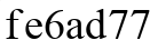

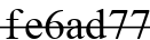

In [0]:
from IPython.display import Image as pyimg, display
import matplotlib.pyplot as plt

display(pyimg('/content/captcha0.png'))
display(pyimg('/content/cap1.png'))

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt



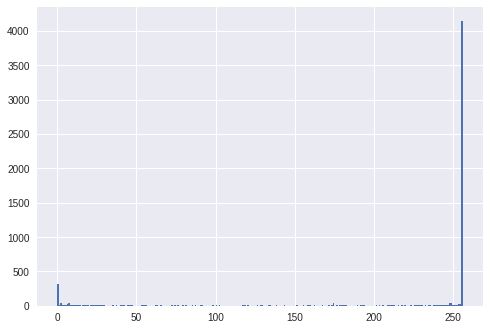

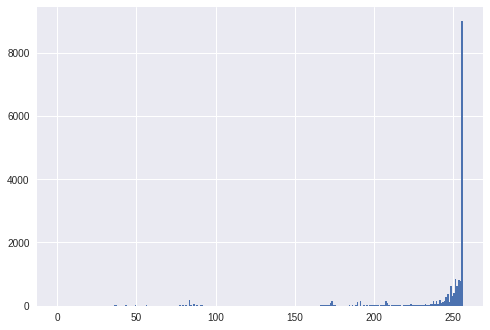

True

In [0]:
img = cv2.imread('/content/captcha0.png',0)
plt.hist(img.ravel(),256,[0,256])
plt.show()

img = cv2.imread('/content/img6.png')
plt.hist(img.ravel(),256,[0,256])
plt.show()
cv2.imwrite("result1.png", img)


In [0]:


horizontal_inv = cv2.bitwise_not(img)
masked_img = cv2.bitwise_and(img, img, mask=horizontal_inv)
masked_img_inv = cv2.bitwise_not(masked_img)
cv2.imwrite("result1.png", masked_img_inv)
cv2.imwrite("result2.png", masked_img)
cv2.imwrite("result3.png", horizontal_inv)


kernel = np.ones((1,2),np.uint8)
dilation = cv2.dilate(horizontal_inv,kernel,iterations = 2) 
cv2.imwrite("result.png", dilation)
ret,thresh2 = cv2.threshold(dilation,160,255,cv2.THRESH_BINARY_INV) 
thresh2=cv2.bitwise_not(thresh2)
cv2.imwrite("resultt.png", thresh2)

error: ignored

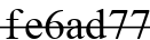

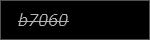

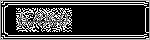

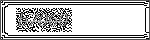

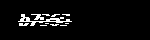

In [0]:
display(pyimg('/content/cap1.png'))
display(pyimg('/content/result3.png'))
display(pyimg('/content/result2.png'))
display(pyimg('/content/result1.png'))
#display(pyimg('/content/result.png'))

display(pyimg('/content/resultt.png'))



In [0]:
from PIL import Image
img = cv2.imread('/content/cap1.png',0)

cv2.imwrite("resultt.png", thresh2)

True

In [0]:
display(im2)


array([[151, 197, 165, ..., 168, 195, 153],
       [191, 255, 245, ..., 243, 247, 174],
       [164, 247, 247, ..., 255, 255, 180],
       ...,
       [164, 247, 247, ..., 255, 255, 180],
       [191, 255, 245, ..., 243, 247, 174],
       [151, 197, 165, ..., 168, 195, 153]], dtype=uint8)

In [0]:
image = Image.open('/content/img6.png').convert("L") # Grayscale conversion
for i in range(12):
  
  cropped_image = image.crop((0 + 13*i, 0 , 13 + 13*i, 40))
  cropped_image.save("cropped_image" + str(i)+".png")


pixel_matrix = cropped_image.load()
for col in range(0, cropped_image.height):
    for row in range(0, cropped_image.width):
        if pixel_matrix[row, col] >= 150:
            pixel_matrix[row, col] = 255
image.save("thresholded_image.png")


In [0]:
display(pyimg('/content/img6.png'))
for i in range(12):
  
  display(pyimg('/content/cropped_image' + str(i) + '.png'))

display(pyimg('/content/thresholded_image.png'))

